# Sign Language MNIST and Gesture Recoginition CNN

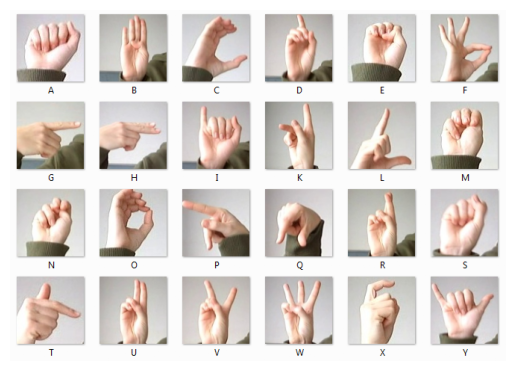

In [1]:
import matplotlib.pyplot as plt
image = plt.imread('amer_sign2.png')
plt.axis('off')
plt.imshow(image)
plt.show()

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
train=pd.read_csv('sign_mnist_train.csv')

In [4]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
test=pd.read_csv('sign_mnist_test.csv')
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [6]:
# Get our training labels
labels=train['label'].values

In [7]:
# View the unique labels, 24 in total
unique_val=np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<Axes: ylabel='count'>

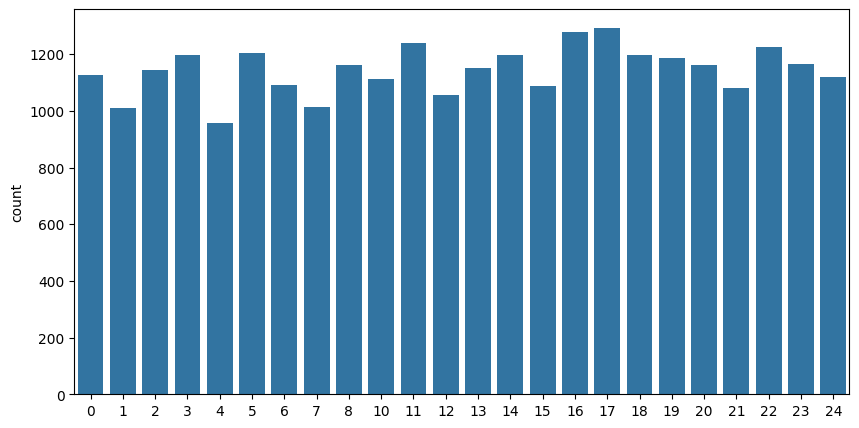

In [8]:
# Plot the quantities in each class
plt.figure(figsize=(10,5))
sns.countplot(x=labels)

In [9]:
# Drop trainig labels from our training date s we can seprate it
train.drop('label',axis=1,inplace=True)

In [10]:
# Extract the image data from each row in our csv, remember it's in a row of 784 columns
images=train.values
images=np.array([np.reshape(i,(28,28)) for i in images])
images=np.array([i.flatten() for i in images])

In [11]:
# hot one encoder our labels
from sklearn.preprocessing import LabelBinarizer
label_binarize=LabelBinarizer()
labels=label_binarize.fit_transform(labels)

In [12]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


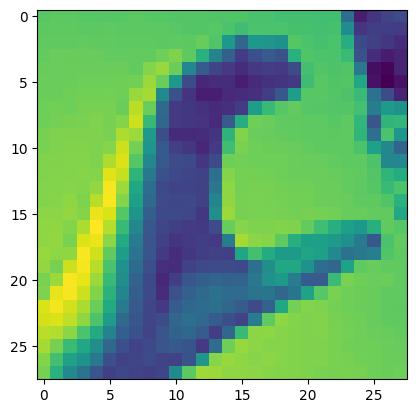

In [13]:
# Inspect an image
index=2
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [14]:
# !pip install opencv-python

In [17]:
# Use OpenCV to view 10 random images from our training data
import cv2

for i in range(0,10):
  rand=np.random.randint(0,len(images))
  input_im=images[rand]

  sample=input_im.reshape(28,28).astype(np.uint8)
  sample=cv2.resize(sample,None,fx=10,fy=10,interpolation=cv2.INTER_CUBIC)
  cv2.imshow("sample image",sample) 
  cv2.waitKey(500)  # Wait for 500 milliseconds (0.5 seconds)

cv2.destroyAllWindows()

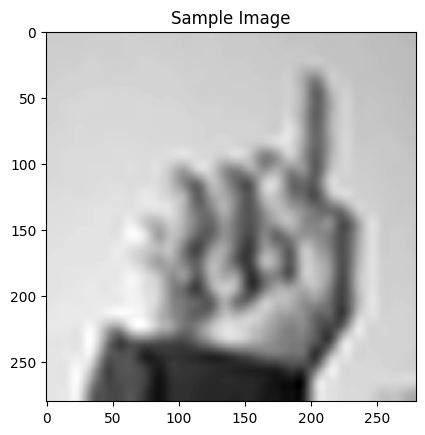

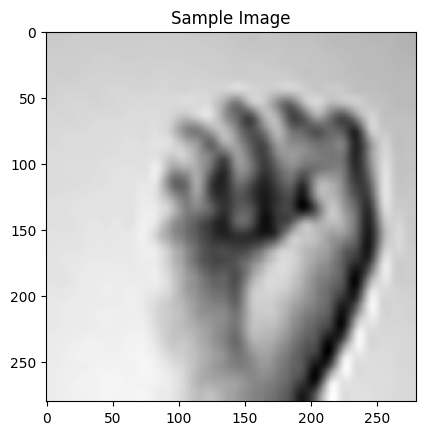

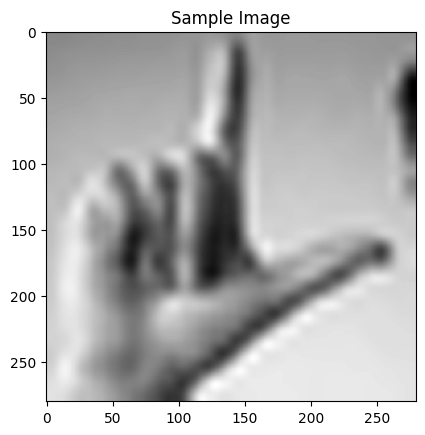

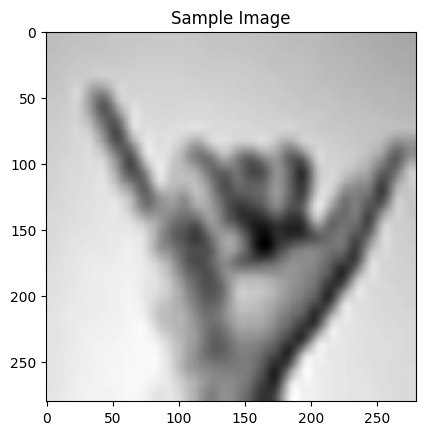

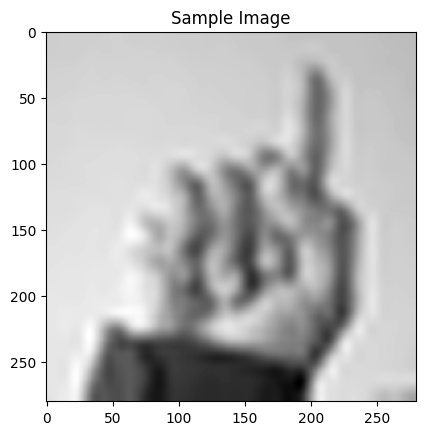

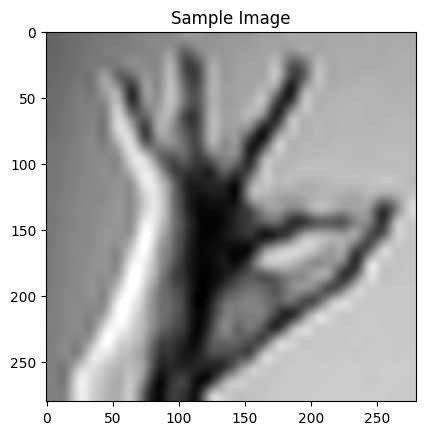

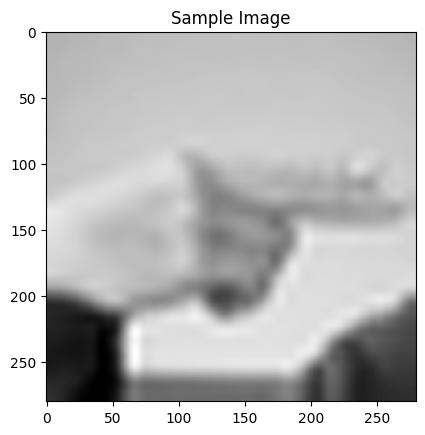

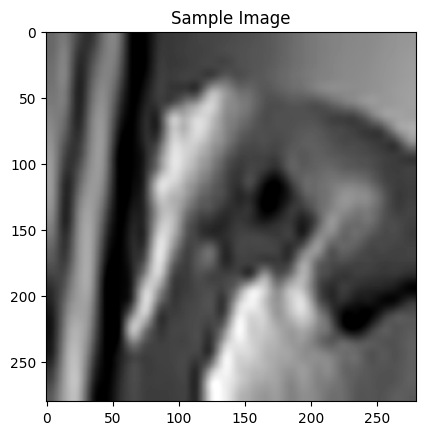

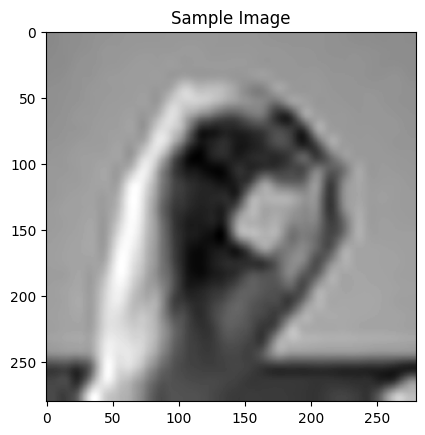

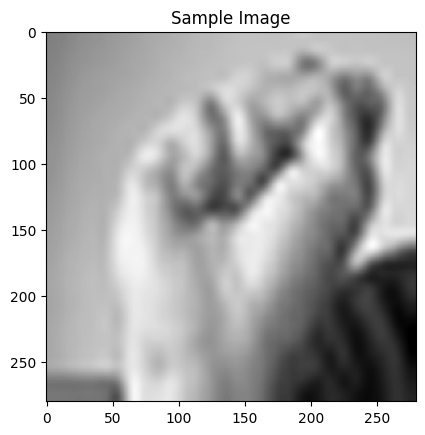

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Assuming you have a list named 'images' containing your training data

for i in range(0, 10):
    rand = np.random.randint(0, len(images))
    input_im = images[rand]

    sample = input_im.reshape(28, 28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx=10, fy=10, interpolation=cv2.INTER_CUBIC)

    plt.figure()
    plt.imshow(sample, cmap='gray')
    plt.title("Sample Image")
    plt.show()

In [18]:
# Split our data into x_train,x_test,y_trian,y_test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(images,labels,test_size=0.3,random_state=101)

In [19]:
# Start loading our tenserflow modules and define our batch size
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Conv2D, MaxPooling2D, Flatten, Dropout

batch_size=128
num_classes=24
pochs=10

In [20]:
# Sclae our images
x_train=x_train/225
x_test=x_test/225 

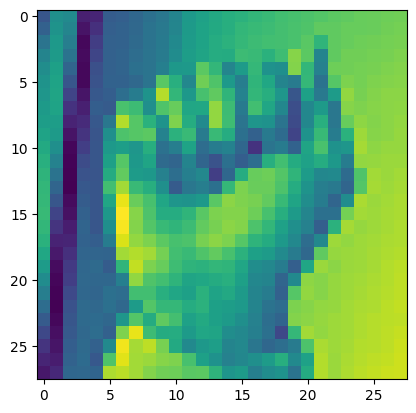

In [21]:
# Reshape them into the size required by TF and Keras
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

plt.imshow(x_train[0].reshape(28,28))

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Assuming num_classes is defined somewhere in your code
# and represents the number of classes in your classification problem

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.20))

# Make sure num_classes is defined somewhere
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)          0

In [26]:
#In the above model summary, we have three convolutional layers with max-pooling, followed by a flatten layer,
#a dense layer with 128 units, a dropout layer, and a final dense layer with 24 units. The total number of parameters is 85,912.

In [27]:
# Train our model
epochs=10
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=epochs,batch_size=batch_size)

Epoch 1/10


151/151 [==============================] - 16s 93ms/step - loss: 2.5038 - accuracy: 0.2348 - val_loss: 1.3394 - val_accuracy: 0.5853
Epoch 2/10
151/151 [==============================] - 15s 98ms/step - loss: 1.0797 - accuracy: 0.6349 - val_loss: 0.6531 - val_accuracy: 0.7973
Epoch 3/10
151/151 [==============================] - 17s 111ms/step - loss: 0.6229 - accuracy: 0.7942 - val_loss: 0.3848 - val_accuracy: 0.8871
Epoch 4/10
151/151 [==============================] - 14s 93ms/step - loss: 0.3943 - accuracy: 0.8682 - val_loss: 0.2378 - val_accuracy: 0.9281
Epoch 5/10
151/151 [==============================] - 16s 103ms/step - loss: 0.2605 - accuracy: 0.9155 - val_loss: 0.1328 - val_accuracy: 0.9660
Epoch 6/10
151/151 [==============================] - 17s 111ms/step - loss: 0.1648 - accuracy: 0.9483 - val_loss: 0.0832 - val_accuracy: 0.9797
Epoch 7/10
151/151 [==============================] - 19s 127ms/step - loss: 0.1095 - accuracy: 0.9688 - val_loss: 0.0564 - val_acc

In [27]:
# The values indicate that the model is improving as the epochs progress. The training accuracy and validation accuracy are increasing, 
# while the training and validation loss are decreasing. This suggests that the model is learning and generalizing well on the given dataset. 
# The goal is to achieve a high accuracy on both training and validation datasets, indicating that the model is not only memorizing the training data
# (overfitting) but also performing well on unseen data.

In [28]:
# Save our Model
model.save("sign_mnist_cnn_50_Epochs.h5")
print("Model Saved")

C:\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model Saved


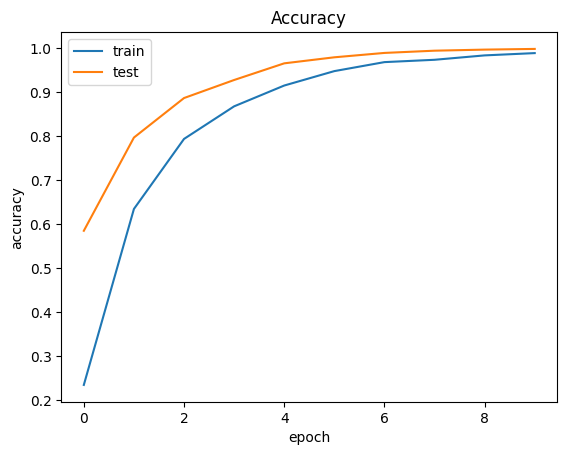

In [29]:
# View our training history graphically
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel("epoch")
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [30]:
test_labels = test['label']
test.drop('label', axis = 1, inplace = True)

In [31]:
# Reshape our test data so that we can evaluate its performance on unseen data

from sklearn.preprocessing import LabelBinarizer

# Instantiate the LabelBinarizer
label_binarizer = LabelBinarizer()

test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

# Correct the variable name here from label_binrizer to label_binarizer
test_labels = label_binarizer.fit_transform(test_labels)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

test_images.shape
y_pred = model.predict(test_images)

225/225 [==============================] - 2s 9ms/step


In [32]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_labels, y_pred.round())
print("Accuracy:", accuracy)

Accuracy: 0.8541550474065811


In [33]:
# Create function to match Label to letter
def getLetter(result):
    class_labels = {0: 'A',
                    1: 'B',
                    2: 'C',
                    3: 'D',
                    4: 'E',
                    5: 'F',
                    6: 'G',
                    7: 'H',
                    8: 'I',
                    9: 'K',
                    10: 'L',
                    11: 'M',
                    12: 'N',
                    13: 'O',
                    14: 'P',
                    15: 'Q',
                    16: 'R',
                    17: 'S',
                    18: 'T',
                    19: 'U',
                    20: 'V',
                    21: 'W',
                    22: 'X',  
                    23: 'V'}  

    try:
        res = int(result)
        return class_labels[res]
    except:
        return "Error"


# Test on Actual Webcam Input

In [38]:
import cv2

# Assuming you have the 'getLetter' function and 'model' defined

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    
    # Define region of interest
    roi = frame[100:400, 320:620]
    cv2.imshow('roi', roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)

    cv2.imshow('roi_scaled_and_gray', roi)
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (255, 0, 0), 5)

    roi = roi.reshape(1, 28, 28, 1)

    # Use the predict method and find the class with the highest probability
    predictions = model.predict(roi, verbose=0)
    predicted_class = int(predictions.argmax(axis=-1)[0])

    result = str(predicted_class)
    
    cv2.putText(copy, getLetter(result), (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    cv2.imshow('frame', copy)

    if cv2.waitKey(1) == 13:  # 13 is the Enter Key
        break

cap.release()
cv2.destroyAllWindows()

# Inference:
## Performace is less then adequate because our training data is very diffrent from our real life data